# Applied Analytics Demo
### By Intelligent Automation Solution

# Iris Dataset
https://archive.ics.uci.edu/ml/datasets/iris
## Background -
<img alt="image info" src="./iris-machinelearning.png" width="750"/>

## The General Data Science Process
1). Collection
2). Cleaning
3). Exploratory Data Analysis
4). Model Building
5). Model Deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

Above are different packages that we can import that allow us to run models that we would otherwise have to make from scratch. This allows us to save a lot of time and share information!

## 1). Collection & 2). Cleaning

In [ ]:
iris_dataset = sns.load_dataset("iris")
iris_dataset.head()

In [4]:
iris_dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## 3). Exploratory Data Analysis

In [332]:
len(iris_dataset)

150

In [333]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

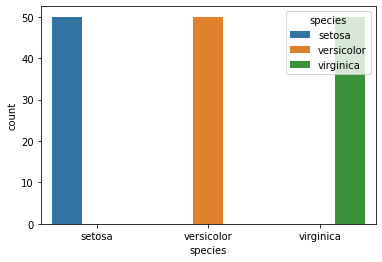

In [334]:
sns.countplot(x ="species", hue ="species", data = iris_dataset)
iris_dataset.loc[:,"species"].value_counts()

<AxesSubplot:>

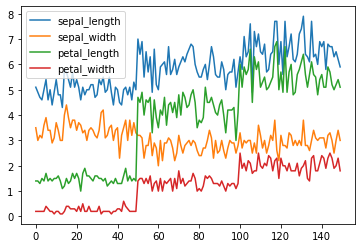

In [335]:
iris_dataset.plot()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

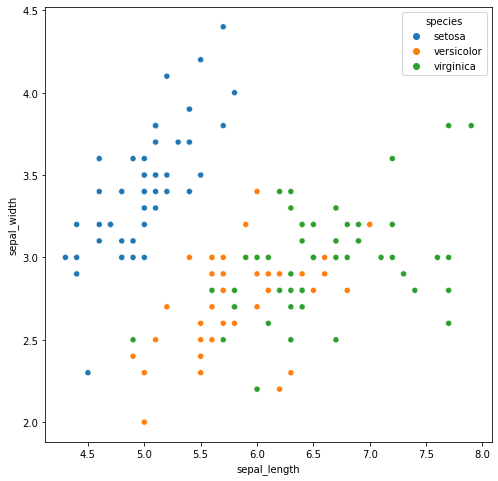

In [336]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'sepal_length', y = 'sepal_width',data = iris_dataset, hue = 'species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

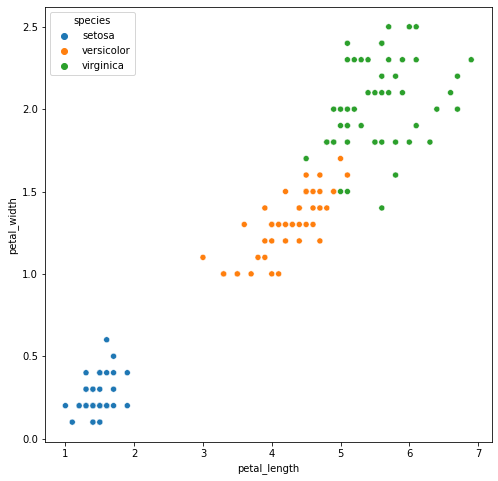

In [337]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = iris_dataset, hue = 'species')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

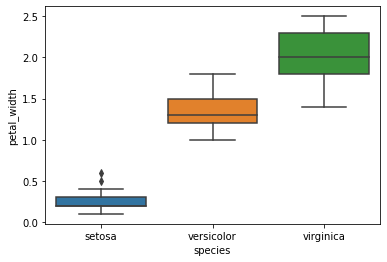

In [338]:
sns.boxplot(x = "species", y="petal_width", data=iris_dataset)

In [339]:
correlation = iris_dataset.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


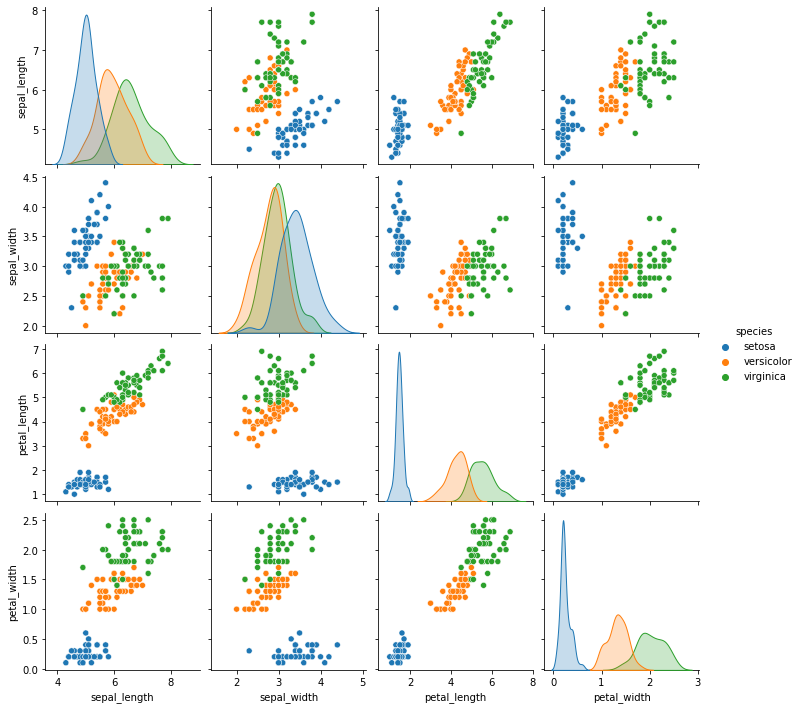

In [340]:
sns.pairplot(iris_dataset, hue="species")

# 4). Model Building

# Problem: I have the flower dimensions, and I want to be able to predict the species of flowers with just the dimensions. How would I achieve that?

# Supervised vs Unsupervised Learning Models
### Supervised learning uses examples of previous data to forecast
### Unsupervised Learning draws insights by itself

## Unsupervised Machine Learning Example - K-Means
### Groups based on clusters.
Clusters are determined by minimizing the distance between the center points (centroids) and the points assigned to it.

<img alt="image info" src="./kmeansViz.png" width="500"/>

Image: https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

In [341]:
answer = iris_dataset.species
iris_dataset.drop(columns='species', inplace=True)

In [249]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

In [342]:
prediction = kmeans.fit_predict(iris_dataset)
prediction[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

The K means models created three clusters labeled 0, 1 ,2

In [348]:
print(np.unique(prediction))

[0 1 2]


Let's match our predictions to the iris dataset so we can visualize the results.

In [237]:
iris_dataset["prediction"] = prediction

These are the "centroids" coordinates of our clusters. Left to right there are 4 columns because we used 4 columns of data points. Top to bottom are 3 rows because we set out algorithm to create 3 clusters.

In [349]:
print(kmeans.cluster_centers_) #display cluster centers

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


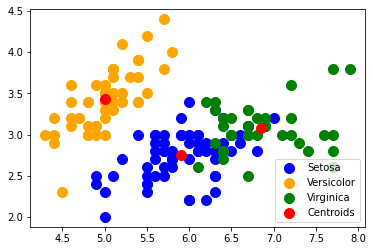

In [350]:
plt.scatter(iris_dataset.values[prediction == 0, 0], iris_dataset.values[prediction == 0, 1], s = 100, c = 'blue', label = 'Setosa')
plt.scatter(iris_dataset.values[prediction == 1, 0], iris_dataset.values[prediction == 1, 1], s = 100, c = 'orange', label = 'Versicolor')
plt.scatter(iris_dataset.values[prediction == 2, 0], iris_dataset.values[prediction == 2, 1], s = 100, c = 'green', label = 'Virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

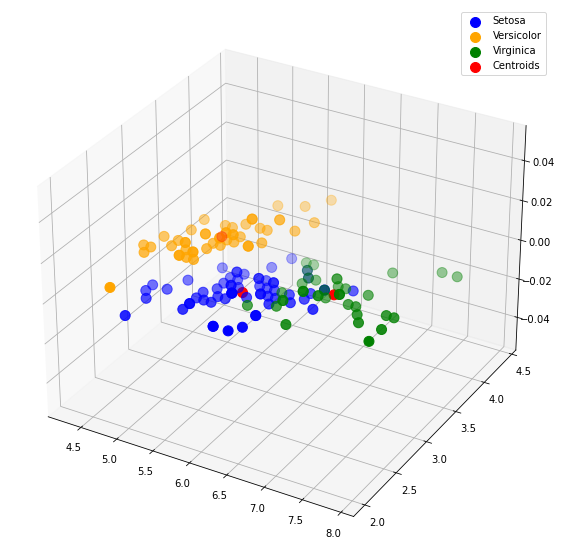

In [351]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(iris_dataset.values[prediction == 0, 0], iris_dataset.values[prediction == 0, 1], s = 100, c = 'blue', label = 'Setosa')
plt.scatter(iris_dataset.values[prediction == 1, 0], iris_dataset.values[prediction == 1, 1], s = 100, c = 'orange', label = 'Versicolor')
plt.scatter(iris_dataset.values[prediction == 2, 0], iris_dataset.values[prediction == 2, 1], s = 100, c = 'green', label = 'Virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [352]:
# We need to assign the clusters numbers to the appropriate species

In [353]:
answer = answer.replace('setosa', 1)
answer = answer.replace('versicolor',0)
answer = answer.replace('virginica',2)

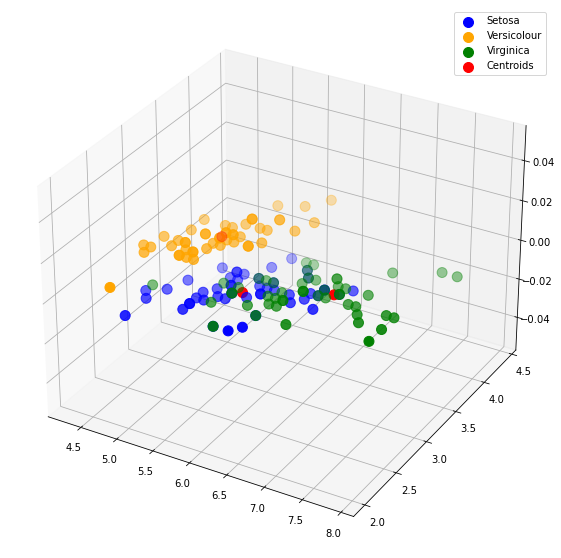

In [354]:
fig = plt.figure(figsize = (10,10))
fig.add_subplot(111, projection='3d')

plt.scatter(iris_dataset.values[answer == 0, 0], iris_dataset.values[answer == 0, 1], s = 100, c = 'blue', label = 'Setosa')
plt.scatter(iris_dataset.values[answer == 1, 0], iris_dataset.values[answer == 1, 1], s = 100, c = 'orange', label = 'Versicolour')
plt.scatter(iris_dataset.values[answer == 2, 0], iris_dataset.values[answer == 2, 1], s = 100, c = 'green', label = 'Virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [241]:
answer = answer.replace('setosa', 1)
answer = answer.replace('versicolor',0)
answer = answer.replace('virginica',2)

In [361]:
print("Accuracy - ", round(accuracy_score(answer, prediction) * 100,2),"%")

Accuracy -  89.33 %


### Observation: The overall accuracy is 89.33%. However, may not be the accuracy between different clusters. Let's analyze.

In [358]:
(cluster , counts) = np.unique(prediction, return_counts=True)
print(counts)

[62 50 38]


### Versicolor has a 100% accuracy because of it's "uniqueness" compared to the other two species. Let's evaluate the accuracy between Viriginica and Setosa.

In [366]:
print("Accuracy of Versicolor - ", round(accuracy_score(answer[:50], prediction[:50]) * 100,2),"%")

Accuracy Versicolor -  100.0 %


In [367]:
print("Accuracy between Virginica and Setosa - ", round(accuracy_score(answer[50:], prediction[50:]) * 100,2),"%")

Accuracy between Virginica and Setosa -  84.0 %


## 5). Deploying the Model
Now that we are satisfied with our model, lets deploy it :)

In [401]:
map = {
    1: 'Setosa',
    0: 'Versicolor',
    2: 'Virginica'
}

### Original Dataset to reference to test out our model.

In [408]:
iris_dataset = sns.load_dataset("iris")
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## The Model.

In [409]:
def iris_species_predictor(sepal_length, sepal_width, petal_length, petal_width):
    print("Based on the dimensions of your iris, it is most likely a",map[kmeans.predict([[sepal_length,sepal_width,petal_length,petal_width]])[0]],".")

## Let's test it out.

In [410]:
iris_species_predictor(5, 3.5,1.4,.2)

Based on the dimensions of your iris, it is most likely a Setosa .


In [411]:
iris_species_predictor(6, 3.0,5,2.8)

Based on the dimensions of your iris, it is most likely a Virginica .


### Now try your own dimensions. Enter your dimensions is this order: sepal_length, sepal_width, petal_length, petal_width

In [413]:
iris_species_predictor(0,0,0,0)

Based on the dimensions of your iris, it is most likely a Setosa .


# Congratulations! We successfully created a machine learning model.